In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [17]:
df = pd.read_csv("data.csv",parse_dates=["posted","scraped"])

df = df.loc[df.test==False]

df.head()

,fname,url,category,subreddit,title,description,upvotes,posted,scraped,niche,test
0,cgptykrzcez71.jpg,https://i.redd.it/cgptykrzcez71.jpg,cats,catpictures,Caturday morning TV 😺,NaN,247.0,2021-11-13 11:22:11,2021-11-21 09:28:28.376338,0.0,False
1,EGjVMqx.jpg,https://i.imgur.com/EGjVMqx.jpg,cats,catpictures,Round loaf!,NaN,24.0,2021-11-13 02:23:31,2021-11-21 09:28:28.376338,0.0,False
2,y45936kis8z71.jpg,https://i.redd.it/y45936kis8z71.jpg,cats,catpictures,Taken over fall wreath,NaN,427.0,2021-11-12 16:38:49,2021-11-21 09:28:28.376338,0.0,False
3,irl2nzyro8z71.jpg,https://i.redd.it/irl2nzyro8z71.jpg,cats,catpictures,"My kitten, Topaz!",NaN,196.0,2021-11-12 16:17:45,2021-11-21 09:28:28.376338,0.0,False
4,vlsh4hijg8z71.jpg,https://i.redd.it/vlsh4hijg8z71.jpg,cats,catpictures,My Tom is not impressed having to wait for the...,NaN,620.0,2021-11-12 15:31:23,2021-11-21 09:28:28.376338,0.0,False


In [3]:
model = SentimentIntensityAnalyzer()

In [19]:
model.polarity_scores("Hello")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [20]:
def sentiments(x):
    
    values = model.polarity_scores(x["title"])
    
    x["sentiment_positive"] = values["pos"]
    x["sentiment_neutral"] = values["neu"]
    x["sentiment_negative"] = values["neg"]
    
    return x

In [22]:
df = df.apply(sentiments,axis=1)

In [24]:
df.columns

Index(['fname', 'url', 'category', 'subreddit', 'title', 'description',
       'upvotes', 'posted', 'scraped', 'niche', 'test', 'sentiment_positive',
       'sentiment_neutral', 'sentiment_negative'],
      dtype='object')

In [25]:
df.head()

,fname,url,category,subreddit,title,description,upvotes,posted,scraped,niche,test,sentiment_positive,sentiment_neutral,sentiment_negative
0,cgptykrzcez71.jpg,https://i.redd.it/cgptykrzcez71.jpg,cats,catpictures,Caturday morning TV 😺,NaN,247.0,2021-11-13 11:22:11,2021-11-21 09:28:28.376338,0.0,False,0.333,0.667,0.000
1,EGjVMqx.jpg,https://i.imgur.com/EGjVMqx.jpg,cats,catpictures,Round loaf!,NaN,24.0,2021-11-13 02:23:31,2021-11-21 09:28:28.376338,0.0,False,0.000,1.000,0.000
2,y45936kis8z71.jpg,https://i.redd.it/y45936kis8z71.jpg,cats,catpictures,Taken over fall wreath,NaN,427.0,2021-11-12 16:38:49,2021-11-21 09:28:28.376338,0.0,False,0.000,1.000,0.000
3,irl2nzyro8z71.jpg,https://i.redd.it/irl2nzyro8z71.jpg,cats,catpictures,"My kitten, Topaz!",NaN,196.0,2021-11-12 16:17:45,2021-11-21 09:28:28.376338,0.0,False,0.000,1.000,0.000
4,vlsh4hijg8z71.jpg,https://i.redd.it/vlsh4hijg8z71.jpg,cats,catpictures,My Tom is not impressed having to wait for the...,NaN,620.0,2021-11-12 15:31:23,2021-11-21 09:28:28.376338,0.0,False,0.000,0.808,0.192


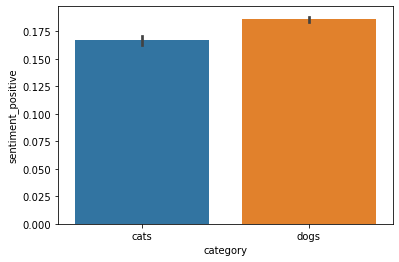

In [28]:
sns.barplot(data=df,x="category",y="sentiment_positive");

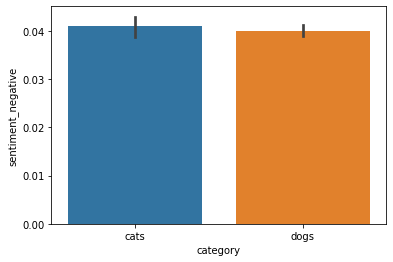

In [29]:
sns.barplot(data=df,x="category",y="sentiment_negative");

In [31]:
df[["sentiment_positive","sentiment_neutral","sentiment_negative"]].mean()

sentiment_positive    0.180948
sentiment_neutral     0.778780
sentiment_negative    0.040272
dtype: float64

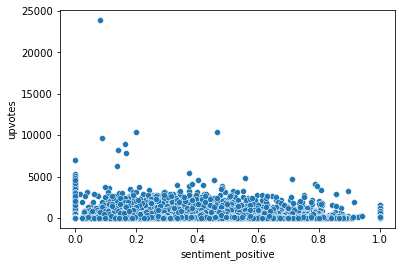

In [34]:
sns.scatterplot(data=df,x="sentiment_positive",y="upvotes");

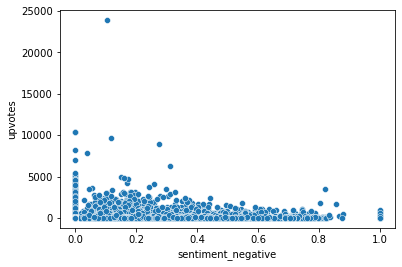

In [35]:
sns.scatterplot(data=df,x="sentiment_negative",y="upvotes");

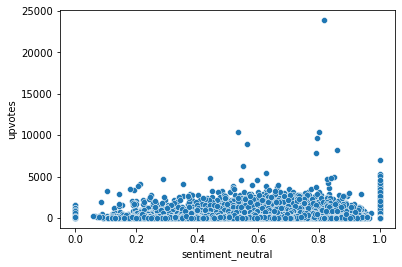

In [36]:
sns.scatterplot(data=df,x="sentiment_neutral",y="upvotes");